In [ ]:
# clusterization on heat map 

from sklearn.cluster import KMeans
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.patheffects as pe

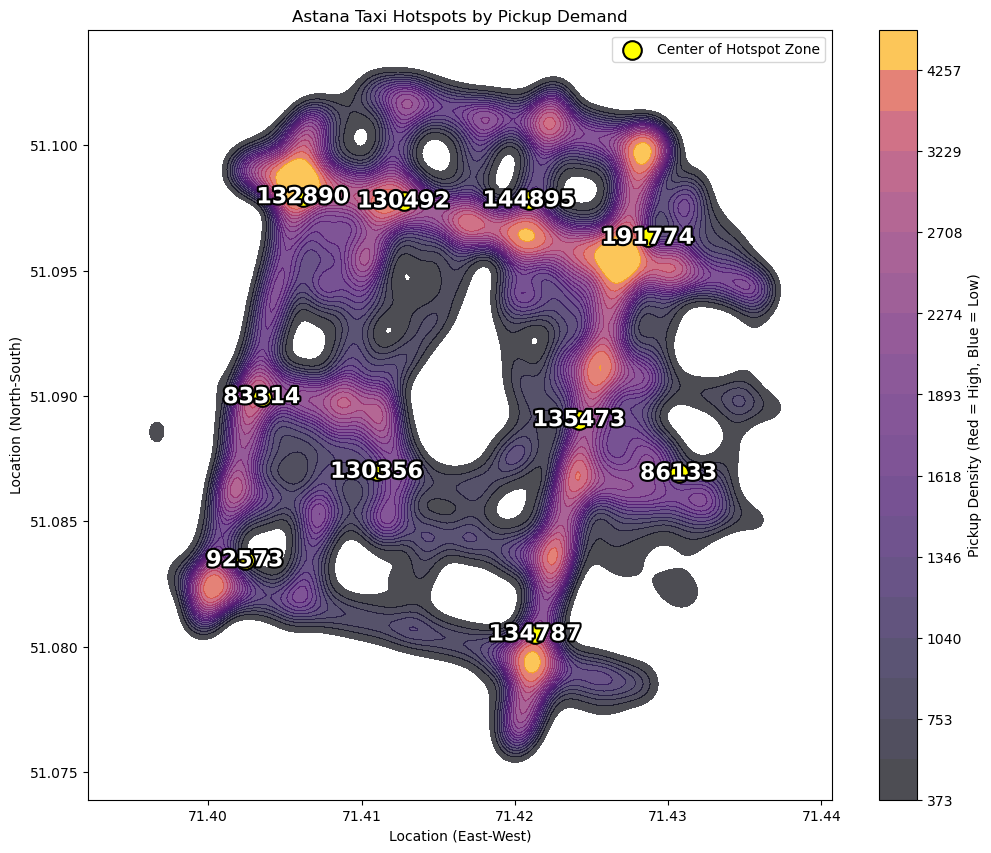

In [ ]:
data = pd.read_csv("../data/geo_locations_astana_hackathon.csv")
X = data[["lat", "lng"]]

clusters = 10

kmeans = KMeans(n_clusters=clusters, random_state=42, n_init=10)
data["clusters"] = kmeans.fit_predict(X)


demand_counts = data['clusters'].value_counts()

plt.figure(figsize=(12, 10))

sns.kdeplot(
    x=data['lng'],
    y=data['lat'],
    cmap='inferno',  
    fill=True,
    levels=20,
    alpha=0.7,       
    cbar=True,
    cbar_kws={'label': 'Pickup Density (Red = High, Blue = Low)'}
)

# labels and a title
plt.xlabel('Location (East-West)')
plt.ylabel('Location (North-South)')
plt.title('Astana Taxi Hotspots by Pickup Demand')

# center of the busy zones
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='yellow', s=180, edgecolors='black', linewidth=1.5, label='Center of Hotspot Zone')


for i, center in enumerate(centers):
    # demand count for the current zone
    demand = demand_counts[i]
    plt.text(
        center[1], center[0], str(demand), 
        fontsize=16, 
        color='white', 
        weight='bold', 
        ha='center', 
        va='center',
        path_effects=[pe.withStroke(linewidth=3, foreground='black')] 
    )

plt.legend()
plt.savefig('demand_hotspot_map.png')

plt.show()